# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
pd.options.display.float_format = '${:,.2f}'.format
pd.set_option('display.max_columns', 500)

In [2]:
zf = zipfile.ZipFile('creditcard.zip')
df = pd.read_csv(zf.open('creditcard.csv'))

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,$0.00,$-1.36,$-0.07,$2.54,$1.38,$-0.34,$0.46,$0.24,$0.10,$0.36,$0.09,$-0.55,$-0.62,$-0.99,$-0.31,$1.47,$-0.47,$0.21,$0.03,$0.40,$0.25,$-0.02,$0.28,$-0.11,$0.07,$0.13,$-0.19,$0.13,$-0.02,$149.62,0
1,$0.00,$1.19,$0.27,$0.17,$0.45,$0.06,$-0.08,$-0.08,$0.09,$-0.26,$-0.17,$1.61,$1.07,$0.49,$-0.14,$0.64,$0.46,$-0.11,$-0.18,$-0.15,$-0.07,$-0.23,$-0.64,$0.10,$-0.34,$0.17,$0.13,$-0.01,$0.01,$2.69,0
2,$1.00,$-1.36,$-1.34,$1.77,$0.38,$-0.50,$1.80,$0.79,$0.25,$-1.51,$0.21,$0.62,$0.07,$0.72,$-0.17,$2.35,$-2.89,$1.11,$-0.12,$-2.26,$0.52,$0.25,$0.77,$0.91,$-0.69,$-0.33,$-0.14,$-0.06,$-0.06,$378.66,0
3,$1.00,$-0.97,$-0.19,$1.79,$-0.86,$-0.01,$1.25,$0.24,$0.38,$-1.39,$-0.05,$-0.23,$0.18,$0.51,$-0.29,$-0.63,$-1.06,$-0.68,$1.97,$-1.23,$-0.21,$-0.11,$0.01,$-0.19,$-1.18,$0.65,$-0.22,$0.06,$0.06,$123.50,0
4,$2.00,$-1.16,$0.88,$1.55,$0.40,$-0.41,$0.10,$0.59,$-0.27,$0.82,$0.75,$-0.82,$0.54,$1.35,$-1.12,$0.18,$-0.45,$-0.24,$-0.04,$0.80,$0.41,$-0.01,$0.80,$-0.14,$0.14,$-0.21,$0.50,$0.22,$0.22,$69.99,0


In [4]:
df[df.Class==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,$406.00,$-2.31,$1.95,$-1.61,$4.00,$-0.52,$-1.43,$-2.54,$1.39,$-2.77,$-2.77,$3.20,$-2.90,$-0.60,$-4.29,$0.39,$-1.14,$-2.83,$-0.02,$0.42,$0.13,$0.52,$-0.04,$-0.47,$0.32,$0.04,$0.18,$0.26,$-0.14,$0.00,1
623,$472.00,$-3.04,$-3.16,$1.09,$2.29,$1.36,$-1.06,$0.33,$-0.07,$-0.27,$-0.84,$-0.41,$-0.50,$0.68,$-1.69,$2.00,$0.67,$0.60,$1.73,$0.28,$2.10,$0.66,$0.44,$1.38,$-0.29,$0.28,$-0.15,$-0.25,$0.04,$529.00,1
4920,"$4,462.00",$-2.30,$1.76,$-0.36,$2.33,$-0.82,$-0.08,$0.56,$-0.40,$-0.24,$-1.53,$2.03,$-6.56,$0.02,$-1.47,$-0.70,$-2.28,$-4.78,$-2.62,$-1.33,$-0.43,$-0.29,$-0.93,$0.17,$-0.09,$-0.16,$-0.54,$0.04,$-0.15,$239.93,1
6108,"$6,986.00",$-4.40,$1.36,$-2.59,$2.68,$-1.13,$-1.71,$-3.50,$-0.25,$-0.25,$-4.80,$4.90,$-10.91,$0.18,$-6.77,$-0.01,$-7.36,$-12.60,$-5.13,$0.31,$-0.17,$0.57,$0.18,$-0.44,$-0.05,$0.25,$-0.66,$-0.83,$0.85,$59.00,1
6329,"$7,519.00",$1.23,$3.02,$-4.30,$4.73,$3.62,$-1.36,$1.71,$-0.50,$-1.28,$-2.45,$2.10,$-4.61,$1.46,$-6.08,$-0.34,$2.58,$6.74,$3.04,$-2.72,$0.01,$-0.38,$-0.70,$-0.66,$-1.63,$1.49,$0.57,$-0.01,$0.15,$1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,"$169,142.00",$-1.93,$1.13,$-4.52,$1.75,$-1.57,$-2.01,$-0.88,$0.70,$-2.06,$-5.59,$2.12,$-5.42,$-1.24,$-6.67,$0.40,$-2.90,$-4.57,$-1.32,$0.39,$1.25,$0.78,$-0.32,$0.64,$-0.29,$0.54,$0.79,$0.29,$0.15,$390.00,1
280143,"$169,347.00",$1.38,$1.29,$-5.00,$1.41,$0.44,$-1.33,$-1.41,$0.25,$-1.13,$-3.23,$2.86,$-3.10,$-0.79,$-5.21,$-0.61,$-2.16,$-3.27,$-0.69,$0.74,$0.23,$0.37,$0.03,$-0.15,$-0.08,$0.52,$0.74,$0.39,$0.19,$0.76,1
280149,"$169,351.00",$-0.68,$1.13,$-2.21,$0.47,$-1.12,$-0.00,$-2.23,$1.21,$-0.65,$-3.46,$1.79,$-2.78,$-0.42,$-4.06,$-0.71,$-1.60,$-5.04,$-0.51,$0.27,$0.25,$0.75,$0.83,$0.19,$0.03,$-0.74,$0.47,$0.39,$0.19,$77.89,1
281144,"$169,966.00",$-3.11,$0.59,$-5.40,$1.82,$-0.84,$-2.94,$-2.21,$1.06,$-1.63,$-5.25,$1.93,$-5.03,$-1.13,$-6.42,$0.14,$-2.55,$-4.61,$-1.48,$-0.04,$0.31,$0.58,$-0.27,$-0.46,$-0.18,$-0.33,$0.61,$0.88,$-0.25,$245.00,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Exploratory Data Analysis

### Data Cleaning
Check Missing Values and Outliers

In [6]:
df.isnull().sum().any()

False

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

D:\Anaconda belgeler\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

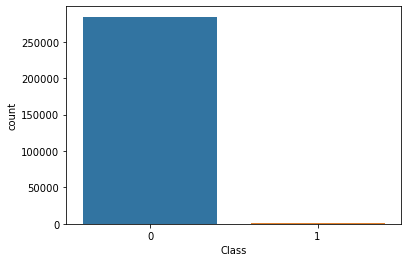

In [8]:
sns.countplot(df.Class)

---
---


## 2. Data Preprocessing

#### Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(df[["Amount"]])
df[["Amount"]]=scaler.transform(df[["Amount"]])

In [10]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,$0.00,$-1.36,$-0.07,$2.54,$1.38,$-0.34,$0.46,$0.24,$0.10,$0.36,$0.09,$-0.55,$-0.62,$-0.99,$-0.31,$1.47,$-0.47,$0.21,$0.03,$0.40,$0.25,$-0.02,$0.28,$-0.11,$0.07,$0.13,$-0.19,$0.13,$-0.02,$0.01,0
1,$0.00,$1.19,$0.27,$0.17,$0.45,$0.06,$-0.08,$-0.08,$0.09,$-0.26,$-0.17,$1.61,$1.07,$0.49,$-0.14,$0.64,$0.46,$-0.11,$-0.18,$-0.15,$-0.07,$-0.23,$-0.64,$0.10,$-0.34,$0.17,$0.13,$-0.01,$0.01,$0.00,0


#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [11]:
X=df.drop("Class", axis=1)
y=df.Class

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify=y)

In [13]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [14]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=41)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of X_train_new: {}'.format(X_train_new.shape))
print('After OverSampling, the shape of y_train_new: {} \n'.format(y_train_new.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_new==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_new==0)))

Before OverSampling, counts of label '1': 344
Before OverSampling, counts of label '0': 199020 

After OverSampling, the shape of X_train_new: (398040, 30)
After OverSampling, the shape of y_train_new: (398040,) 

After OverSampling, counts of label '1': 199020
After OverSampling, counts of label '0': 199020


---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

***i. Import Libraries***

In [15]:
from sklearn.linear_model import LogisticRegression

***ii. Model Training***

In [16]:
lr=LogisticRegression(solver='lbfgs').fit(X_train_new, y_train_new)

D:\Anaconda belgeler\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


***iii. Prediction and Model Evaluating***

In [17]:
y_predlr=lr.predict(X_test)


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, classification_report,precision_recall_curve

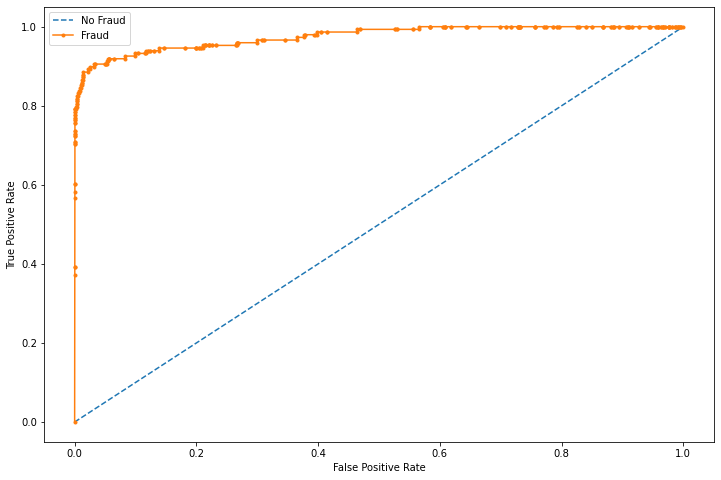

In [19]:
# predict probabilities
yhat = lr.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Fraud')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Fraud')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [20]:
print(roc_auc_score(y_test, y_predlr))
print("--------------")
print(recall_score(y_test, y_predlr))
print("--------------")
print(precision_score(y_test, y_predlr))
print("--------------")
print(accuracy_score(y_test, y_predlr))
print("--------------")
print(confusion_matrix(y_test, y_predlr))
print("--------------")
print(classification_report(y_test, y_predlr))

0.9342669637807102
--------------
0.8851351351351351
--------------
0.08468002585649645
--------------
0.9832285851386304
--------------
[[83879  1416]
 [   17   131]]
--------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.89      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443



In [21]:
precision_recall_curve(y_test, y_predlr)

(array([0.00173215, 0.08468003, 1.        ]),
 array([1.        , 0.88513514, 0.        ]),
 array([0, 1], dtype=int64))

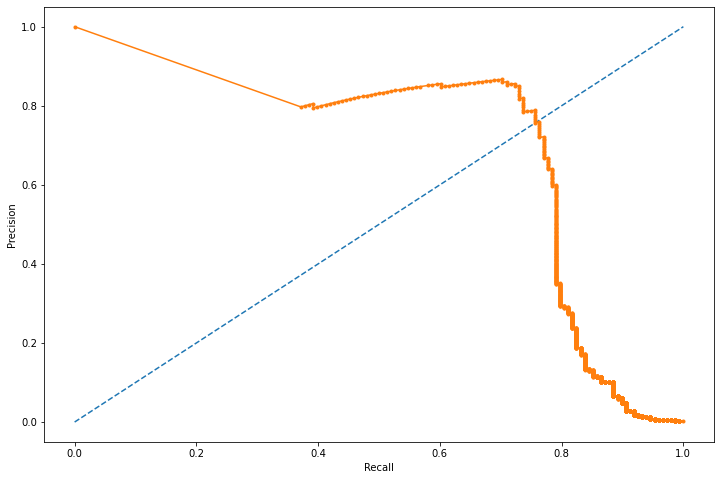

In [22]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pos_probs)
plt.figure(figsize=(12,8))
plt.plot([0, 1], linestyle='--')
plt.plot(lr_recall, lr_precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training and Prediction***

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf=RandomForestClassifier().fit(X_train_new, y_train_new)
y_pred=rf.predict(X_test)

***ii. Plot Precision and Recall Curve***


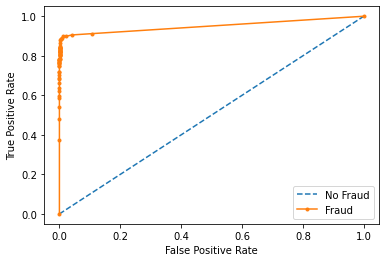

In [25]:
# predict probabilities
yhatrf = rf.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhatrf[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Fraud')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Fraud')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [26]:
print(roc_auc_score(y_test, y_pred))
print("--------------")
print(recall_score(y_test, y_pred))
print("--------------")
print(precision_score(y_test, y_pred))
print("--------------")
print(accuracy_score(y_test, y_pred))
print("--------------")
print(confusion_matrix(y_test, y_pred))
print("--------------")
print(classification_report(y_test, y_pred))

0.8884373074053008
--------------
0.777027027027027
--------------
0.8984375
--------------
0.9994616293903538
--------------
[[85282    13]
 [   33   115]]
--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [27]:
model = RandomForestClassifier(n_estimators=300, max_depth=16).fit(X_train_new, y_train_new)

y_predmodel=model.predict(X_test)

In [28]:
print(roc_auc_score(y_test, y_predmodel))
print("--------------")
print(recall_score(y_test, y_predmodel))
print("--------------")
print(precision_score(y_test, y_predmodel))
print("--------------")
print(accuracy_score(y_test, y_predmodel))
print("--------------")
print(confusion_matrix(y_test, y_predmodel))
print("--------------")
print(classification_report(y_test, y_predmodel))

0.8917043076255222
--------------
0.7837837837837838
--------------
0.7837837837837838
--------------
0.9992509626300574
--------------
[[85263    32]
 [   32   116]]
--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.78      0.78       148

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [29]:
importances=pd.DataFrame(model.feature_importances_, index=X_train.columns)

In [30]:
importances.sort_values(by=0, ascending=False).head(6)

,0
V14,$0.21
V10,$0.13
V12,$0.13
V17,$0.11
V4,$0.09
V11,$0.06


In [31]:
X_train_final=X_train_new[["V4", "V10", "V11","V12", "V14","V17"]]
X_test_final=X_test[["V4", "V10", "V11","V12", "V14","V17"]]
y_train_final=y_train_new

In [32]:
my_model = RandomForestClassifier(n_estimators=300).fit(X_train_final, y_train_final)

y_predfinal=my_model.predict(X_test_final)

In [33]:
print(recall_score(y_test, y_predfinal))
print("--------------")
print(confusion_matrix(y_test, y_predfinal))
print("--------------")
print(classification_report(y_test, y_predfinal))

0.8040540540540541
--------------
[[85216    79]
 [   29   119]]
--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.60      0.80      0.69       148

    accuracy                           1.00     85443
   macro avg       0.80      0.90      0.84     85443
weighted avg       1.00      1.00      1.00     85443



### Neural Network from Sklearn

***Prediction and Model Evaluating***

In [34]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_new, y_train_new)
y_predmlp=clf.predict(X_test)

***Plot Precision and Recall Curve***

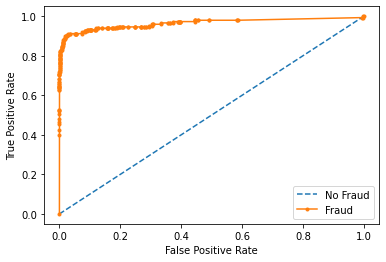

In [35]:
# predict probabilities
yhatmlp = clf.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhatmlp[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Fraud')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Fraud')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [36]:
print(roc_auc_score(y_test, y_predmlp))

0.9322427093251877


In [37]:
print(recall_score(y_test, y_predmlp))
print("--------------")
print(precision_score(y_test, y_predmlp))
print("--------------")
print(accuracy_score(y_test, y_predmlp))
print("--------------")
print(confusion_matrix(y_test, y_predmlp))
print("--------------")
print(classification_report(y_test, y_predmlp))

0.8783783783783784
--------------
0.09885931558935361
--------------
0.9859204381868614
--------------
[[84110  1185]
 [   18   130]]
--------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.10      0.88      0.18       148

    accuracy                           0.99     85443
   macro avg       0.55      0.93      0.59     85443
weighted avg       1.00      0.99      0.99     85443



## Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

### Save and Export the Model as .pkl


In [39]:
import pickle
pickle.dump(my_model, open( "model.pkl", "wb" ))

In [41]:
model = pickle.load(open('model.pkl', 'rb'))

### Save and Export Variables as .pkl

In [42]:
pickle.dump(scaler, open( "scaler", "wb" ))
scaler = pickle.load(open( "scaler", "rb" ))